In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

# load previous student-day data

In [2]:
all_students_features_trunc = pd.read_csv('do_not_touch/all_students_features_trunc.csv', index_col = 0)
print(all_students_features_trunc.shape)
all_students_features_trunc.head()

C:\Users\yz685\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


(2891563, 13)


,employee_id_hash,is_greek,is_athlete,academic_career,academic_plan1,hd_notify_date,day_idx,positives_identified_on_this_day,infected_on_this_day,previous_infection,week_idx,biweek_idx,class_prevalence_on_this_day
0,0x0001CEED0A3584312155FD3B695D2EB6,0,0,UG,ESAG-BS,NaN,2021-08-26,23,0,0,0,0,NaN
1,0x0001CEED0A3584312155FD3B695D2EB6,0,0,UG,ESAG-BS,NaN,2021-08-27,43,0,0,0,0,NaN
2,0x0001CEED0A3584312155FD3B695D2EB6,0,0,UG,ESAG-BS,NaN,2021-08-28,57,0,0,0,0,NaN
3,0x0001CEED0A3584312155FD3B695D2EB6,0,0,UG,ESAG-BS,NaN,2021-08-29,55,0,0,0,0,NaN
4,0x0001CEED0A3584312155FD3B695D2EB6,0,0,UG,ESAG-BS,NaN,2021-08-30,39,0,0,0,0,NaN


Text(0, 0.5, 'Number of students')

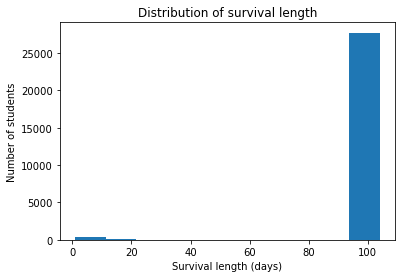

In [3]:
all_students_features_trunc.groupby(['employee_id_hash']).size().hist(grid=False, bins = 10)
plt.title('Distribution of survival length')
plt.xlabel('Survival length (days)')
plt.ylabel('Number of students')

In [4]:
all_students_features_trunc.groupby(['employee_id_hash']).size().value_counts(bins = 10)

(93.7, 104.0]    27708
(0.896, 11.3]      396
(11.3, 21.6]        81
(21.6, 31.9]        40
(83.4, 93.7]        20
(73.1, 83.4]        18
(42.2, 52.5]        17
(52.5, 62.8]        14
(62.8, 73.1]        11
(31.9, 42.2]         8
dtype: int64

In [5]:
len(all_students_features_trunc['employee_id_hash'].unique())

28313

In [6]:
all_students_features_trunc.groupby(['employee_id_hash']).size().value_counts()

104    27622
3         56
4         55
7         48
2         43
       ...  
83         1
70         1
44         1
57         1
31         1
Length: 74, dtype: int64

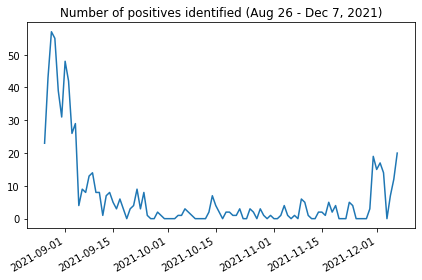

In [7]:
import matplotlib.dates as dates

idx = pd.date_range('2021-08-26', '2021-12-07')

fig, ax = plt.subplots()
ax.plot_date(idx.to_pydatetime(), all_students_features_trunc['positives_identified_on_this_day'][:104], '-')
plt.gcf().autofmt_xdate()
plt.title('Number of positives identified (Aug 26 - Dec 7, 2021)')

plt.tight_layout()
plt.show()



In [8]:
unique = all_students_features_trunc[['employee_id_hash', 'hd_notify_date', 'academic_career', 'is_greek', 'is_athlete']].drop_duplicates()
infections_by_day_involved = unique.loc[unique['hd_notify_date'].notnull()].groupby(['hd_notify_date']).size()


In [9]:
# distribution of academic_career across student-days
pd.concat(
    (all_students_features_trunc['academic_career'].value_counts(normalize = False),
    all_students_features_trunc['academic_career'].value_counts(normalize = True)),
    axis = 1
)

,academic_career,academic_career
UG,1238701,0.428385
GR,899232,0.310985
UG_G,318942,0.110301
GM,180414,0.062393
UG_A,105460,0.036472
LA,96506,0.033375
VM,52204,0.018054
EE,104,0.000036


In [10]:
# distribution of academic_career across students
pd.concat(
    (unique['academic_career'].value_counts(normalize = False),
    unique['academic_career'].value_counts(normalize = True)),
    axis = 1
)

,academic_career,academic_career
UG,12057,0.425847
GR,8675,0.306396
UG_G,3332,0.117684
GM,1744,0.061597
UG_A,1054,0.037227
LA,942,0.033271
VM,508,0.017942
EE,1,0.000035


In [11]:
unique['is_greek'].value_counts()

0    24971
1     3342
Name: is_greek, dtype: int64

In [12]:
unique['is_athlete'].value_counts()

0    27245
1     1068
Name: is_athlete, dtype: int64

In [13]:
# 10 individuals marked is_greek but are not undergraduates
unique[(unique['academic_career'] != 'UG_G') & (unique['is_greek'] == 1)]

,employee_id_hash,hd_notify_date,academic_career,is_greek,is_athlete
87048,0x07A584E59B2A531B0ACB31300460C803,NaN,GR,1,0
329472,0x1E23B1B44026258E210FE5F307E6D589,NaN,GR,1,0
358488,0x20E5282AA0F8D079FFCB3F7CC09EE781,NaN,GR,1,0
629200,0x3848B35E0D7172D858AFE6A214B1D1CC,NaN,GR,1,0
867568,0x4CEBAF9FDF0E384B261E2B672BC13AD0,NaN,LA,1,0
1521936,0x844C9003C4DE8BD791507E65A78279E7,NaN,GR,1,0
1633320,0x8E0BB67D49D84BB347F7823F24BD67F7,NaN,GR,1,0
2422784,0xD2CDEFD8260A21A4AF9E93345F157FFB,NaN,GR,1,0
2489760,0xD86AEEADF673F038EA6AC1ABF63997CC,NaN,GM,1,0
2832128,0xF5DD4014B797260D9007D6903AB7AE86,NaN,GR,1,0


In [14]:
# 14 individuals marked is_athlete but are not undergraduates
unique[(unique['academic_career'] != 'UG_A') & (unique['is_athlete'] == 1)]

,employee_id_hash,hd_notify_date,academic_career,is_greek,is_athlete
126464,0x0B421063A794F4EF7609C11BE94E34E8,NaN,GR,0,1
326664,0x1DF49F916C8E1A1B3B19206F88EB70D9,NaN,GR,0,1
1242904,0x6BF8468DDC4E05FE0034785E01966C87,NaN,GR,0,1
1275976,0x6E858785FB2B05A25C6562823BF69B97,NaN,GR,0,1
1803984,0x9D1F843D75D15AD205CF309F403E3B72,NaN,GM,0,1
1857336,0xA1A8433D25077822DF19813D988FE3EA,NaN,GR,0,1
1969968,0xAB9FC44872D51801DDC532695615D70E,NaN,GR,0,1
2120872,0xB898EBA91AC600DE4FC75F7CA183C39A,NaN,GR,0,1
2342704,0xCC0E0A0BCB132AB661707BF96070D430,NaN,GR,0,1
2401360,0xD10837274C965C660E8A5929F4D5E917,NaN,GR,0,1


# re-examine the Greek / sports team membership flags

In [15]:
# Now the question, can we trust the UG_G and UG_A categorizations?
# compare it with the class registration data, which is confirmed to have been saved in Oct 2021


In [16]:
class_registrations = pd.read_csv('do_not_touch/class_registration.csv')
class_registrations_students = class_registrations[['employee_id_hash', 'is_greek', 'is_athlete', 'academic_career']]
class_registrations_students.drop_duplicates(inplace=True, ignore_index = True)

print(class_registrations.shape, class_registrations_students.shape)

(143873, 12) (28153, 4)


<ipython-input-16-f7f704e01ab4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_registrations_students.drop_duplicates(inplace=True, ignore_index = True)


In [17]:
class_registrations_students.head()

,employee_id_hash,is_greek,is_athlete,academic_career
0,0x0001CEED0A3584312155FD3B695D2EB6,0,0,UG
1,0x0006D10D9D2AF2FA09ED007D742633B1,0,0,GR
2,0x0019A7D6C123A2907CAECA890EE78500,0,0,UG
3,0x001E81320F975882CF328BE65817DD98,0,0,UG
4,0x00201F174069EA2D6081AF34AD4DDE41,0,0,GR


In [18]:
class_registrations_students['is_greek'].value_counts()


0    25448
1     2705
Name: is_greek, dtype: int64

In [19]:
# Let's call the class registration data D1, which is confirmed to be pulled in October 2021
# Let's call the student-day data ("unique") D2, which has been updated a few times and might be pulled around March 2022

# We want to check whether the G/A information in D1 and D2 are consistent
# To do this, we first join the two tables on employee_id_hash

In [20]:
joined = pd.merge(class_registrations_students, unique, how = 'inner', on = 'employee_id_hash')
print(joined.shape)
joined.head()

(28149, 8)


,employee_id_hash,is_greek_x,is_athlete_x,academic_career_x,hd_notify_date,academic_career_y,is_greek_y,is_athlete_y
0,0x0001CEED0A3584312155FD3B695D2EB6,0,0,UG,NaN,UG,0,0
1,0x0006D10D9D2AF2FA09ED007D742633B1,0,0,GR,NaN,GR,0,0
2,0x0019A7D6C123A2907CAECA890EE78500,0,0,UG,NaN,UG,0,0
3,0x001E81320F975882CF328BE65817DD98,0,0,UG,NaN,UG,0,0
4,0x00201F174069EA2D6081AF34AD4DDE41,0,0,GR,NaN,GR,0,0


In [21]:
# for Greek membership:

print('D1 yes, D2 yes: ', joined[(joined['is_greek_x']==1) & (joined['academic_career_y'] == 'UG_G')].shape[0])
print('D1 yes, D2 no: ', joined[(joined['is_greek_x']==1) & (joined['academic_career_y'] != 'UG_G')].shape[0])
print('D1 no, D2 yes: ', joined[(joined['is_greek_x'] !=1) & (joined['academic_career_y'] == 'UG_G')].shape[0])

D1 yes, D2 yes:  2407
D1 yes, D2 no:  298
D1 no, D2 yes:  925


In [22]:
# for athlete membership:

print('D1 yes, D2 yes: ', joined[(joined['is_athlete_x']==1) & (joined['academic_career_y'] == 'UG_A')].shape[0])
print('D1 yes, D2 no: ', joined[(joined['is_athlete_x']==1) & (joined['academic_career_y'] != 'UG_A')].shape[0])
print('D1 no, D2 yes: ', joined[(joined['is_athlete_x'] !=1) & (joined['academic_career_y'] == 'UG_A')].shape[0])

D1 yes, D2 yes:  1035
D1 yes, D2 no:  104
D1 no, D2 yes:  19


In [23]:
# It does seem like a big discrepancy, especially the 900+ people who very likely just joined Greek life in Spring 2022. 
# This is pretty strong evidence for D2 being spring 2022 data.

# So how do we use that? We should use D1 information to fix the student-day data
# This would be our next task


In [24]:
pd.merge(class_registrations_students, unique, how = 'outer', on = 'employee_id_hash')

,employee_id_hash,is_greek_x,is_athlete_x,academic_career_x,hd_notify_date,academic_career_y,is_greek_y,is_athlete_y
0,0x0001CEED0A3584312155FD3B695D2EB6,0.0,0.0,UG,NaN,UG,0.0,0.0
1,0x0006D10D9D2AF2FA09ED007D742633B1,0.0,0.0,GR,NaN,GR,0.0,0.0
2,0x0019A7D6C123A2907CAECA890EE78500,0.0,0.0,UG,NaN,UG,0.0,0.0
3,0x001E81320F975882CF328BE65817DD98,0.0,0.0,UG,NaN,UG,0.0,0.0
4,0x00201F174069EA2D6081AF34AD4DDE41,0.0,0.0,GR,NaN,GR,0.0,0.0
...,...,...,...,...,...,...,...,...
28312,0xFA2717D490A292D3199F6DC6D060761F,NaN,NaN,NaN,NaN,UG,0.0,0.0
28313,0xFD5CC1CC4C954413F7A0CA4FF0318CB3,NaN,NaN,NaN,NaN,UG,0.0,0.0
28314,0xFDF9072DD5D08985A86034F98AE68672,NaN,NaN,NaN,NaN,UG,0.0,0.0
28315,0xFE332FEE0DE4CD7EA4CD32D7361CF44D,NaN,NaN,NaN,NaN,UG,0.0,0.0


In [25]:
# D1 28153, D2 28313
# intersection 28149
# in D1, not in D2: 4
# in D2, not in D1: 164
# union 28317

In [26]:
len(set(class_registrations_students['employee_id_hash']).intersection(set(unique['employee_id_hash'])))


28149

# Correct the Greek / sports team membership feature in the student-day data

In [27]:
# idea: loop over the IDs in D1, look it up in D2
# if the flags misalign, update D2 with D1 information

In [43]:
copy = all_students_features_trunc.copy()

In [35]:
copy.loc[copy['employee_id_hash'] == '0x0001CEED0A3584312155FD3B695D2EB6']['academic_career'].values[0]

'UG'

In [45]:
number_changed = 0

for employee_id_hash in class_registrations_students['employee_id_hash']:
    is_g = class_registrations_students[class_registrations_students['employee_id_hash'] == employee_id_hash]['is_greek'].values[0]
    is_a = class_registrations_students[class_registrations_students['employee_id_hash'] == employee_id_hash]['is_athlete'].values[0]

    if copy.loc[copy['employee_id_hash'] == employee_id_hash]['academic_career'].values != []:
        academic_career_curr = copy.loc[copy['employee_id_hash'] == employee_id_hash]['academic_career'].values[0]
    else:
        continue

    if academic_career_curr in ('UG', 'UG_G', 'UG_A'):
    
        if is_g:
            if academic_career_curr != 'UG_G':
                copy.loc[copy['employee_id_hash'] == employee_id_hash, "academic_career"] = 'UG_G'
                number_changed += 1
                print(employee_id_hash, ' updated to UG_G')
        elif is_a:
            if academic_career_curr != 'UG_A':
                copy.loc[copy['employee_id_hash'] == employee_id_hash, "academic_career"] = 'UG_A'
                number_changed += 1
                print(employee_id_hash, ' updated to UG_A')
        else:
            if academic_career_curr != 'UG':
                copy.loc[copy['employee_id_hash'] == employee_id_hash, "academic_career"] = 'UG'
                number_changed += 1
                print(employee_id_hash, ' updated to UG')

copy.to_csv('0127_all_students_features_trunc.csv')

<ipython-input-45-272030e14cb3>:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if copy.loc[copy['employee_id_hash'] == employee_id_hash]['academic_career'].values != []:
<ipython-input-45-272030e14cb3>:7: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if copy.loc[copy['employee_id_hash'] == employee_id_hash]['academic_career'].values != []:


0x33D1568D35A618D297DED89DB7BC24C4  updated to UG_A
0x33E4DC1CB310407145F3F248471068DE  updated to UG
0x33EF2BE07991359CD624073CD549A370  updated to UG
0x3498FBCC2CA0C1AD68242A7773A0998D  updated to UG
0x34A7B835475697438A2150F9896F5510  updated to UG
0x3517DE734055AD7412FFDF51591663D3  updated to UG
0x3532AD56A10EA78C3C54195C94D70D7E  updated to UG
0x3567B2D10934FF1435B3A53A3D654FD6  updated to UG
0x359C51269B1BEC64140290BBC153D0B0  updated to UG_A
0x35AD3EA484DF6622C7AE4F93DFE621E0  updated to UG
0x35E33E0ACEE92F92E306333C1D61B547  updated to UG
0x361FD863A64B23A354B9023862496285  updated to UG_A
0x3625D265E4794BD77FCC4CB7541C1339  updated to UG_G
0x3680B6439931A970DE3352ECFBCEB8E3  updated to UG_A
0x369B201F25E66851FFAE4B50B7846494  updated to UG
0x36B7572A56521C32A056F27FF8518AC9  updated to UG_G
0x36E65DED4F06C5B9C3107B91A0A1250A  updated to UG
0x372821AB4C0D119344FF6D3218FB1CCB  updated to UG
0x3777C3BCE55F6210634C3B5D13B0A1BE  updated to UG_G
0x37B2C420BD0FFE32D88248768A79851F  

0x591485997E5F2D88E4CE9F3980DA7A63  updated to UG_A
0x5922099B90445E6B43EA965D4939D338  updated to UG
0x5932C6C7D2D6F7073E229460694F1513  updated to UG_G
0x5938130387E902BE2F53FE4EE0C96570  updated to UG_G
0x5941E18401B92D8F8B308CCA02980094  updated to UG
0x59422EFB036A80342A416347951F3EC1  updated to UG
0x59560B992CF1652D6680291CA6C20060  updated to UG
0x59BB6184C73711B9956013339A756042  updated to UG
0x59BE014889435526C35095611FF67359  updated to UG
0x5A583E87CDBFD2CBDD0F8AAD5FDDE7A6  updated to UG
0x5A5A1457307AC69D32E0950F416018EB  updated to UG
0x5ACE3A62AD62EC20D212C1BF9895AF05  updated to UG_G
0x5AD3C1AB2A517541947FD2D71B2479FA  updated to UG
0x5AE6C3481C25EF34DA0E8200F7331CF8  updated to UG
0x5B515EF064CF164FA1BD61F03EB6D9FA  updated to UG
0x5B7EF29A4FE1ACC16DA5B1412FE78791  updated to UG
0x5B8DB371F3783285E0C2F69096EE30A7  updated to UG
0x5BF71250F83D084F2271FEB351ADE013  updated to UG
0x5C6F0CE7A755F5BA5A582DCE5D0A59E0  updated to UG
0x5C7F083D5DA3645AD3356C962DD2BCCA  update

0x78DA26AC95A2D9FAA645EF14368D1DAA  updated to UG
0x78FFF23B44537BD455F33961CBD34880  updated to UG
0x79137FAE079BF99450D1027B259D59DB  updated to UG
0x7949474A6D1507AEDEBE05F333F2BB81  updated to UG
0x795BA133F9F824108A8675A8C14F466D  updated to UG
0x7968F69C75EE58A04B86D13909FCCAAB  updated to UG
0x797EE856173ED00F2AA70169FA873344  updated to UG
0x79BD984A95BE544D152791789F6B1771  updated to UG_A
0x79F66E0A31A1BC4E024C54520D014065  updated to UG_G
0x7A0422875FB52C3EAB0C7EAE538B69D9  updated to UG
0x7B58AC86AD8940F87F8032E83DF4C1AF  updated to UG_G
0x7B91B916429314DE2F53B1D52049871B  updated to UG
0x7BD778B1153A16E2E63B3ED00BC01C30  updated to UG
0x7BE4ED6F01B66F2D9E318C188C474DED  updated to UG_G
0x7C5EC9FD71BDB49D77D9D11FDCB10403  updated to UG
0x7C7E7A3FC3CAD607B2E8949B05DA411D  updated to UG_A
0x7C99B04EB5E276B810BA0CB95899A810  updated to UG
0x7D15223446F74EF1D66167492DB3CF91  updated to UG
0x7D57DA9874E602C5AFAEA96FF3A476EC  updated to UG_A
0x7D7A6AC2330FA72CE657FB5480A30B0C  up

0x9A2BFEAA039DAF961021C93316D4EE73  updated to UG
0x9A366FDC030A85E0ADE804F8B65EF98A  updated to UG_G
0x9A3694DDE85354659095A447D3334B9F  updated to UG_G
0x9A5E26A2A30AD1F2836189312CC294D3  updated to UG_G
0x9B5522ED89DE4857D12371ECC0F45593  updated to UG_G
0x9BB0B3FBC6C0C24FA8727B016B023E7D  updated to UG
0x9BB5C2B91E05EFB6B16971061C22406F  updated to UG_G
0x9BE44173AF7A3BE0CA985D6E0B52C717  updated to UG
0x9C2152A5F7AC33DE457E3EAC65A0A8AA  updated to UG_A
0x9C2961F3264569511A9F172F765F9037  updated to UG
0x9C37FEBC2489C6CAC305C7D599903ACF  updated to UG
0x9C55205685A74AB0E3C46FD29739CEDE  updated to UG_A
0x9CB776C0D1FD808824523BC976F56E54  updated to UG
0x9CD0A79467C7609F4DE585ED7F1744F7  updated to UG
0x9CE6A37FEA83542D2060BB67C50A228C  updated to UG
0x9D4F4EA8E9E915A4059202C218E8AD6C  updated to UG
0x9D67582120F9C683A3A2C44DE62CB7BE  updated to UG
0x9D8AA94599E31C3883105AE687063066  updated to UG
0x9D8CE3EFEA0BEABB5C6D1482EB477E74  updated to UG
0x9D9ED67549CAE2655F8E4EFACE11522C  

0xBB6FE7502EDD943DEB2DEFE76D319EB6  updated to UG
0xBB81103FF7F5F4845922F8375A1ED7C2  updated to UG
0xBBA641C9C65AA8382A1A35D225DEE4DC  updated to UG_G
0xBBB3BB047B449E4A421A0E9B77A9D1E1  updated to UG
0xBBB8742B9E49113CB57D2765307A9968  updated to UG
0xBBBA6662299736B064441E7A83B140DC  updated to UG
0xBC23BD51DBED429A663586EF564135F8  updated to UG_G
0xBC53D0D7ABD89945CB0A6283A36F9115  updated to UG
0xBC5ADCAA21A5A18997E2A9ADDD117491  updated to UG
0xBCCE66742BB5B137E407B2F8A51BBC2B  updated to UG_G
0xBD0F89551EBBBCA14BEBC4C60AC46141  updated to UG_G
0xBD2034FD5C1D8CD4264B62755E2C8A20  updated to UG
0xBD2326B2069C23B4A71D48D6BCC904E9  updated to UG
0xBD368DCCB96684CAA4699A06286F122D  updated to UG
0xBD50755782969B946100B1E1429DE59E  updated to UG_G
0xBD9A24D416C3BF33255B88CBF76A5120  updated to UG
0xBDFC1981AA61E52B3DAC4745270A3100  updated to UG_G
0xBE2226DA8E5A5A3F9F6954082878CF39  updated to UG
0xBE4FB1456FBF29B2D04CBD5813CCA0C5  updated to UG
0xBE70F33A27AB4B3CDAB438A8690DA1C0  up

0xDE54273FF64D66EA072CA266061C5CA9  updated to UG_A
0xDE7D9EAE4307F03E6776AA890C7FC391  updated to UG
0xDE8CFD75FDD70EE501B03F38776A96C0  updated to UG
0xDF4CB4A654F6DD0EF6051FFE38F20516  updated to UG_G
0xDF708CC517E9FE9D38277B3D005A7B7B  updated to UG
0xDF9BFF6E4EBDD625005D575E0E62D4C4  updated to UG_G
0xDFACC6B451C23ABCF6821B0547A04486  updated to UG_A
0xE00E1FE0865174343A4576302CCA6F3F  updated to UG
0xE00F3E92C639BDD0BBD99E9A13CD03F4  updated to UG_A
0xE04B5AEAFE40F31B99FB936795E32002  updated to UG
0xE06EDB962DC5AB5B6ACBF160B682C16E  updated to UG
0xE0A97DED995D9AC27FF3F8AF16586602  updated to UG
0xE1036579123CC6CA5FF6483D9C33F5DD  updated to UG
0xE10F523F92CECBA4648CCBF1134E668C  updated to UG
0xE13F589FFF32FD7B7B870F97B4062B99  updated to UG
0xE1779D001790BC86CCDD77269306495E  updated to UG
0xE1AD1AF529B57D3B2E4EFC0B96763A33  updated to UG
0xE1C794589E2C99F3B1A692833272C961  updated to UG_G
0xE21774CF414E3BD9FE912F7C5C687C09  updated to UG
0xE21F50F148D476F7DBD6BC3F2ED0662E  up

In [46]:
copy.shape

(2891563, 13)

In [48]:
unique_ = copy[['employee_id_hash', 'hd_notify_date', 'academic_career', 'is_greek', 'is_athlete']].drop_duplicates()


In [49]:
pd.concat(
    (unique_['academic_career'].value_counts(normalize = False),
    unique_['academic_career'].value_counts(normalize = True)),
    axis = 1
)

,academic_career,academic_career
UG,12634,0.446226
GR,8675,0.306396
UG_G,2685,0.094833
GM,1744,0.061597
UG_A,1124,0.039699
LA,942,0.033271
VM,508,0.017942
EE,1,0.000035
